4.2

In [74]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

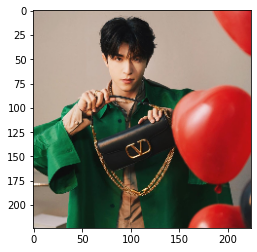

In [75]:
img = cv2.cvtColor(cv2.imread("image6.jpg"),cv2.COLOR_BGR2RGB)
# img.reshape()
center = (img.shape[1]/2,img.shape[0]/2)
h = img.shape[0]
w = img.shape[1]
if(h > w):
    h = w
else:
    w = h
img = cv2.getRectSubPix(img, (w,h),center)
img = cv2.resize(img,(224,224))
plt.rcParams['figure.facecolor'] = 'white'
plt.imshow(img)

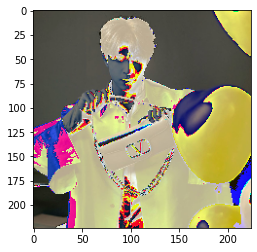

In [76]:
#3D --> 4D
img = expand_dims(img, axis=0)
img_mean = np.array([np.mean(img[0,:,:,0]),np.mean(img[0,:,:,1]),np.mean(img[0,:,:,2])])
img_mean = img_mean.astype("uint8")
img[0,:,:,0] -= img_mean[0]
img[0,:,:,1] -= img_mean[1]
img[0,:,:,2] -= img_mean[2]
img = cv2.cvtColor(img[0],cv2.COLOR_RGB2BGR)
plt.imshow(img)

4.3

In [77]:
model = VGG16()
kernels, biases = model.layers[1].get_weights()
model.summary()
print(kernels)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [78]:
Img_result = np.copy(img)
for j in range(64):
    for i in range(3):
        Img_result[: , :, i] = signal.convolve2d( img[ : , : , i], kernels[: , : , i, j] , mode='same',boundary='fill', fillvalue=0)
print(Img_result.shape)

(224, 224, 3)


(224, 224)


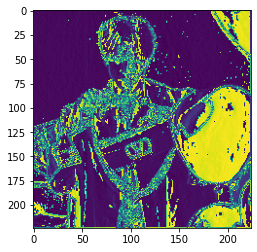

In [79]:
Image_sum = Img_result[ : , : , 0] + Img_result[ : , : , 1] + Img_result[ : , : , 2]
print(Image_sum.shape)
plt.imshow(Image_sum)
plt.show()

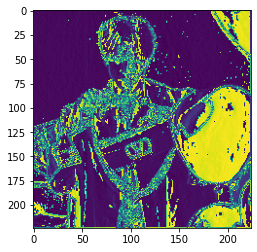

In [80]:
height,weigth = Image_sum.shape
for i in range(height):
    for j in range(weigth):
        if Image_sum[i][j] < 0:
            Image_sum[i][j] = 0
plt.imshow(Image_sum)
plt.show()

In [81]:
Img_result = expand_dims(Img_result, axis=0)
Img_result = preprocess_input(Img_result)
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
Img_result = model.predict(Img_result)

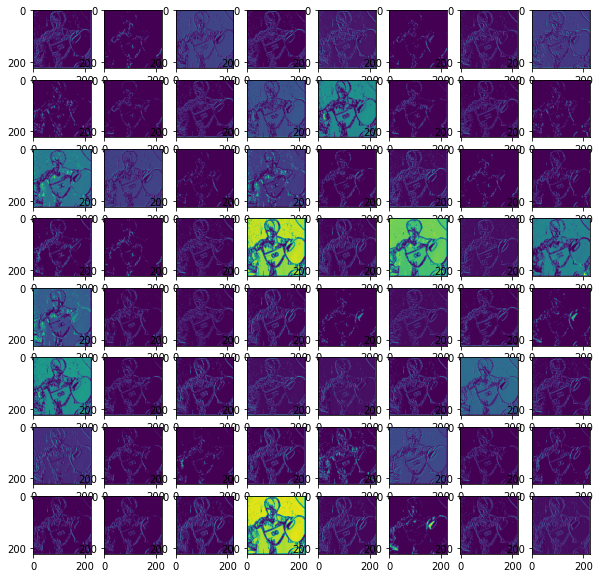

In [82]:
fig, ax = plt.subplots(8, 8, figsize=(10,10))
fig.patch.set_facecolor('white')
index = 0
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(Img_result[0,:,:,index])
        # ax[i,j].axis("off")
        index+=1